In [1]:
import pandas as pd
import torch
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
import sqlite3
import pandas as pd

In [3]:
df  = pd.read_csv('RRABSA.csv')
df

,id,name,email,aspect,comments,rating,Unnamed: 6
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,


In [4]:
k = 1
for i in df['comments']:
    print('(',k,')',i,end='\n')
    k = k+1

( 1 ) The tourist place had provided good services
( 2 ) The food given in the restaurant was delicious. I found it enjoyable!
( 3 ) The relaxed ambience of Thrissur was popular with temples.
( 4 ) The historical prestige and the hotel ambience was good and the service was on point. Good trip!
( 5 ) Hotel services were good
( 6 ) I became ill, so I was admitted in a hospital for 3 days.


In [5]:
sentiment = ['Good','Excellent','Good','Excellent','Very Good','Bad']
df['sentiment'] = sentiment
df

,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad


<Figure size 2500x2000 with 0 Axes>

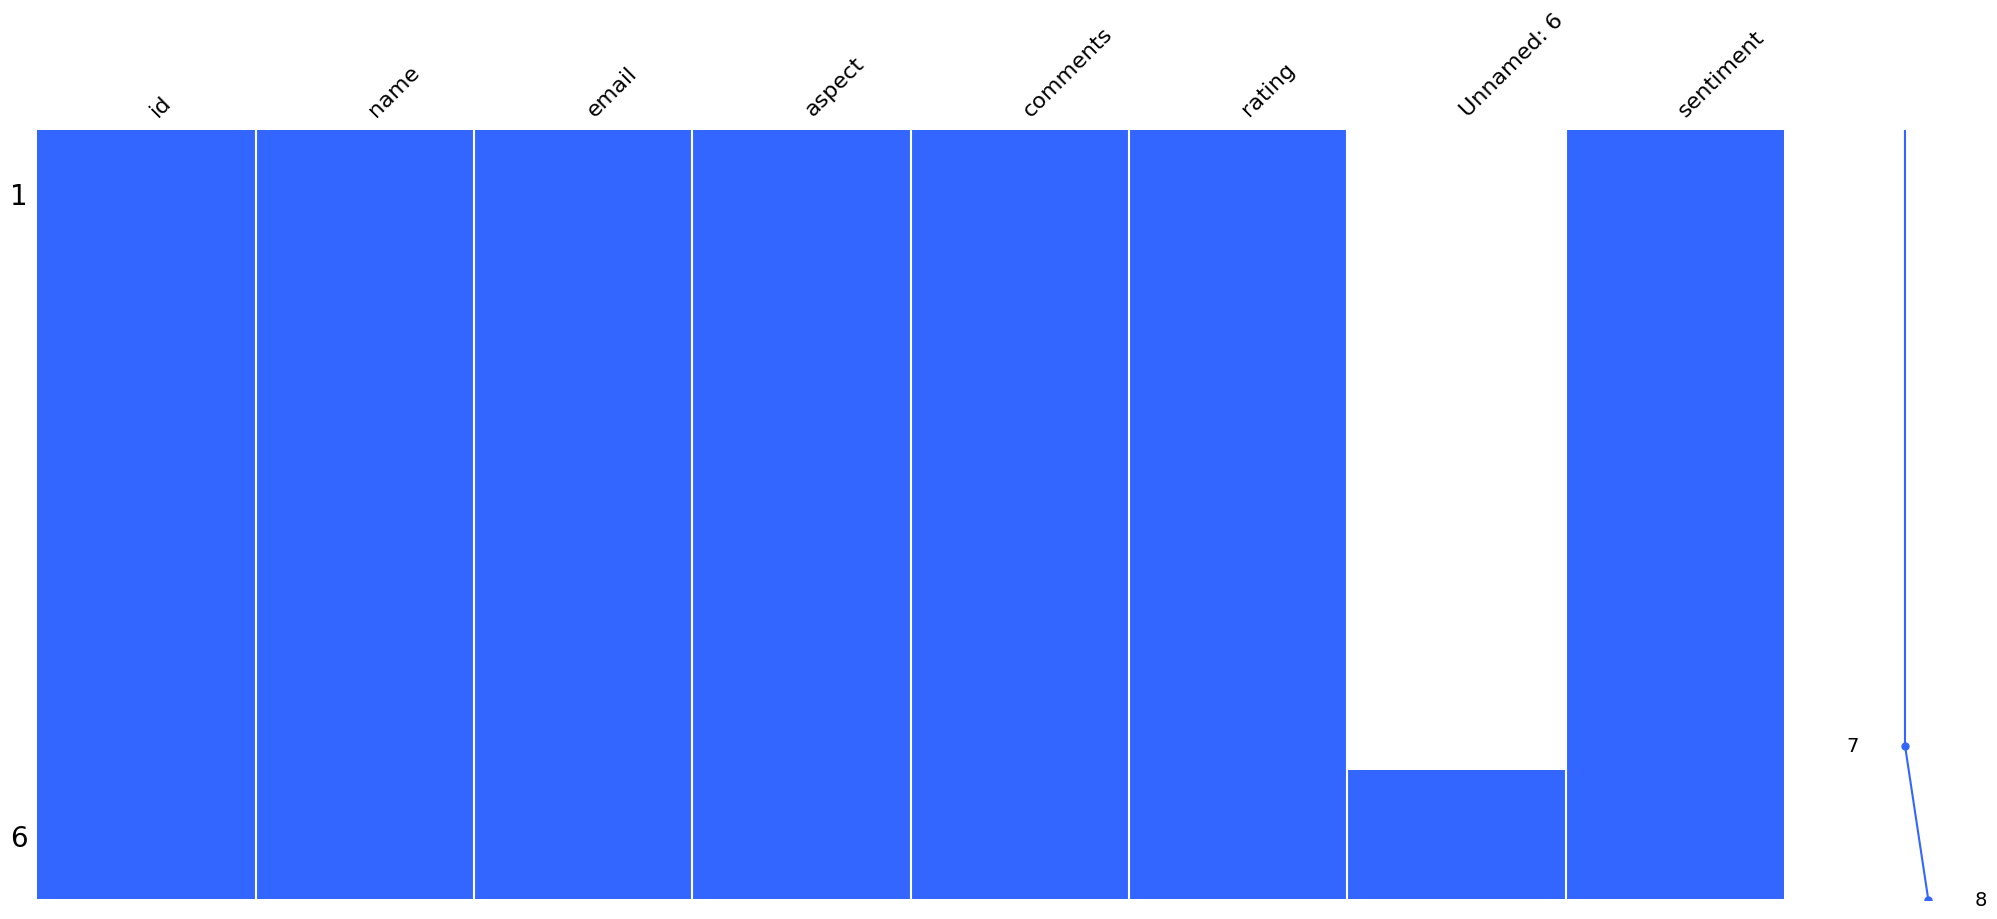

In [6]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [7]:
import re
def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text
# Example string with weird font characters plus an URL which we gonna remove.
sample = "ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 \n https://www.kaggle.com/nkitgupta 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜"
print(f"Text before removing url:- \n {sample}")

sample = remove_url(sample)
print(f"Text after removing url:- \n {sample}")

Text before removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
 https://www.kaggle.com/nkitgupta 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜


In [8]:
print("\u00C7", "\u0043\u0327")
print("\u00C7" == "\u0043\u0327")
print("Ç" == "Ç")

Ç Ç
False
False


In [9]:
import unicodedata as uni
print(f"Text before Unicode Normalization:- \n {sample}")
sample = uni.normalize('NFKD', sample)
print(f"Text after Unicode Normalization:- \n {sample}")

Text before Unicode Normalization:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after Unicode Normalization:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am 😊 to create this notebook


In [10]:
import demoji
def handle_emoji(string):
    emojis = demoji.findall(string)
    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])
    return string
print(f"Before Handling emoji:- \n {sample}")
print(f"After Handling emoji:- \n {handle_emoji(sample)}")

Before Handling emoji:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am 😊 to create this notebook
After Handling emoji:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am  smiling face with smiling eyes to create this notebook


In [11]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()
    return text
sample = "Hi Everyone I am Ankit Gupta."
print(sample)
print(word_tokenizer(sample))

Hi Everyone I am Ankit Gupta.
['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']


In [12]:
from nltk.corpus import stopwords
en_stopwords = set(stopwords.words('english'))
print(f"Stop Words in English : \n{ en_stopwords}")

Stop Words in English : 
{'shouldn', "isn't", 'herself', "shan't", 'a', 'other', 'him', 'off', 'these', 'his', 'mightn', 'or', "won't", 'some', 'which', 'be', 'both', 'couldn', 'too', 'has', 'an', 'then', "she's", 'itself', 'don', 'they', 'any', 'shan', 'we', 'hadn', 'so', 'will', 'our', 't', 'their', 'when', 'there', 'very', 'under', 'few', 'for', 'were', "mightn't", 'her', 'such', 'he', 'you', 'further', 'haven', 'through', 'while', 'own', 'them', 'against', 'yours', 'from', "hasn't", "haven't", 'o', 'but', 'into', 'it', 'who', 'before', 'all', 'by', 'are', 'can', 'just', 're', 'been', "it's", "needn't", 'did', 'doesn', 'theirs', 'my', 'to', 'wasn', 'between', 'hasn', "aren't", 'me', 'aren', 'after', 'again', 'more', 'until', 'because', 'themselves', 'no', 'on', 'myself', 'being', 'in', "couldn't", 'yourself', 'ma', 'out', 'what', 'am', 'each', 'than', 'should', 'd', 'ain', 'didn', 'is', 'had', 'below', 'up', "should've", "you'll", 'mustn', 'ourselves', 'once', 'same', "weren't", "th

In [13]:
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    return text
print(f"Before removing stopwords : {word_tokenizer(sample)}")
print(f"After removing stopwords : {remove_stopwords(word_tokenizer(sample))}")

Before removing stopwords : ['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']
After removing stopwords : ['hi', 'everyone', 'ankit', 'gupta.']


In [14]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
stemmer = PorterStemmer()
# stemmer = LancasterStemmer()
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return text
sample = "I am creating a Notebook"
print(f"Before Stemming : {(sample)}")
print(f"After Stemming : {stemming(word_tokenizer(sample))}")

Before Stemming : I am creating a Notebook
After Stemming : ['i', 'am', 'creat', 'a', 'notebook']


In [15]:
import spacy
sp = spacy.load("en_core_web_sm")
def lemmatization(text):
    # text = [sp(word).lemma_ for word in text]
    text = " ".join(text)
    token = sp(text)
    text = [word.lemma_ for word in token]
    return text

print(f"Before Lemmatization : {word_tokenizer(sample)}")
print(f"After Lemmatization : {lemmatization(word_tokenizer(sample))}")

Before Lemmatization : ['i', 'am', 'creating', 'a', 'notebook']
After Lemmatization : ['I', 'be', 'create', 'a', 'notebook']


In [16]:
from langdetect import detect
en_text = u""""Hi Everyone I am Ankit Gupta."""
print(f" {en_text} : {detect(en_text)}")

hindi_text = u"""मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ"""
print(f"{hindi_text} : {detect(hindi_text)}")

 "Hi Everyone I am Ankit Gupta. : tl
मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ : hi


In [17]:
# Assigning labels to each review
def label(y):
    if y=='Excellent':
        return 3
    elif y=='Very Good':
        return 2
    elif y=='Good':
        return 1
    else:
        return -1
    
from tqdm import tqdm
tqdm.pandas()
df['y'] = df.sentiment.progress_map(label)
df

100%|██████████| 6/6 [00:00<00:00, 5957.82it/s]


,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad,-1


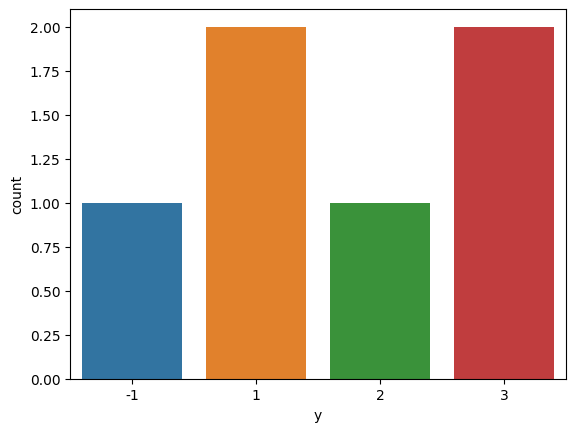

In [18]:
import seaborn as sns
sns.countplot(x = "y", data = df)
plt.show()

In [19]:
P = df[(df['sentiment'] == 'Good')]
positive = list(P[(P['comments'].str.len() > 4) & (P['comments'].str.len() < 350)]['comments'])
len(positive)

2

In [20]:
import nlpaug.augmenter.word as naw
positive[0:49]

['The tourist place had provided good services',
 'The relaxed ambience of Thrissur was popular with temples.']

In [21]:
aug = naw.AntonymAug(name='Antonym_Aug', aug_min=1, aug_max=10, aug_p=0.3, lang='eng', stopwords=en_stopwords, tokenizer=None, 
                     reverse_tokenizer=None, stopwords_regex=None, verbose=0) 
aug_negative = aug.augment(positive)
len(aug_negative)

2

In [22]:
aug_negative[0:4]

['The tourist place had provided bad services',
 'The tense ambience of Thrissur was unpopular with temples.']

In [23]:
def preprocessing(text):
    text = remove_url(text) 
    text = uni.normalize('NFKD', text)
    text = handle_emoji(text)
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)
    return text
from tqdm import tqdm
tqdm.pandas()
df['clean_review'] = df['comments'].progress_map(preprocessing)
df

100%|██████████| 6/6 [00:00<00:00, 63.34it/s]


,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad,-1,I become ill I admit hospital 3 day


In [24]:
reviews = df.clean_review.values.tolist()
from tqdm import tqdm
tqdm.pandas()
df['clean_review2'] = df['clean_review'].progress_map(word_tokenizer)

100%|██████████| 6/6 [00:00<00:00, 6001.87it/s]


In [25]:
df

,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review,clean_review2
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service,"[tourist, place, provide, good, service]"
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable,"[food, give, restaurant, delicious, i, find, e..."
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple,"[relaxed, ambience, thrissur, popular, temple]"
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...,"[historical, prestige, hotel, ambience, good, ..."
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good,"[hotel, service, good]"
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad,-1,I become ill I admit hospital 3 day,"[i, become, ill, i, admit, hospital, 3, day]"


In [26]:
data_words = df['clean_review2'].values.tolist()
print(data_words)
print(len(data_words))

[['tourist', 'place', 'provide', 'good', 'service'], ['food', 'give', 'restaurant', 'delicious', 'i', 'find', 'enjoyable'], ['relaxed', 'ambience', 'thrissur', 'popular', 'temple'], ['historical', 'prestige', 'hotel', 'ambience', 'good', 'service', 'point', 'good', 'trip'], ['hotel', 'service', 'good'], ['i', 'become', 'ill', 'i', 'admit', 'hospital', '3', 'day']]
6


In [28]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [29]:
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=id2word,
                     num_topics=num_topics, iterations=400)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.036*"good" + 0.036*"service" + 0.036*"hotel" + 0.036*"i" + '
  '0.036*"popular" + 0.036*"temple" + 0.036*"ambience" + 0.036*"place" + '
  '0.036*"provide" + 0.036*"thrissur"'),
 (1,
  '0.036*"service" + 0.036*"good" + 0.036*"i" + 0.036*"ambience" + '
  '0.036*"hotel" + 0.036*"provide" + 0.036*"place" + 0.036*"tourist" + '
  '0.036*"restaurant" + 0.036*"popular"'),
 (2,
  '0.036*"good" + 0.036*"service" + 0.036*"i" + 0.036*"hotel" + '
  '0.036*"ambience" + 0.036*"popular" + 0.036*"temple" + 0.036*"tourist" + '
  '0.036*"provide" + 0.036*"place"'),
 (3,
  '0.112*"i" + 0.112*"delicious" + 0.112*"food" + 0.112*"enjoyable" + '
  '0.112*"find" + 0.112*"give" + 0.112*"restaurant" + 0.010*"good" + '
  '0.010*"service" + 0.010*"hotel"'),
 (4,
  '0.036*"good" + 0.036*"service" + 0.036*"hotel" + 0.036*"i" + '
  '0.036*"provide" + 0.036*"popular" + 0.036*"place" + 0.036*"tourist" + '
  '0.036*"ambience" + 0.036*"temple"'),
 (5,
  '0.036*"good" + 0.036*"service" + 0.036*"hotel" + 0.036*"i

In [35]:
%%time
from gensim.models import FastText
fasttext_model = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 1.03 s
Wall time: 2.37 s


In [31]:
%%time
from gensim.models import FastText
fasttext_model1 = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model1)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 1.3 s
Wall time: 3.32 s


In [32]:
%%time
from gensim.models import FastText
fasttext_model2 = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model2)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 938 ms
Wall time: 1.82 s


In [33]:
%%time
from gensim.models import FastText
fasttext_model3 = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model3)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 2.48 s
Wall time: 3.9 s


In [36]:
fasttext_model.save("FastText-Model-For-ABSA.bin")
print(fasttext_model.wv.n_similarity("Very Good","service"))
print(fasttext_model.wv.n_similarity("Hotel services were good","service"))

0.15506539
0.73245305


In [37]:
fasttext_model1.save("FastText-Model-For-ABSA-1.bin")
print(fasttext_model.wv.n_similarity("Excellent","food"))
print(fasttext_model.wv.n_similarity("The historical prestige and the hotel ambience was good and the service was on point. Good trip!","food"))

-0.10728478
0.2123122


In [38]:
fasttext_model2.save("FastText-Model-For-ABSA-2.bin")
print(fasttext_model.wv.n_similarity("Bad","hospitality"))
print(fasttext_model.wv.n_similarity("I became ill, so I was admitted in a hospital for 3 days.","hospitality"))

0.32133222
0.5149182


In [39]:
fasttext_model3.save("FastText-Model-For-ABSA-3.bin")
print(fasttext_model.wv.n_similarity("Good","ambience"))
print(fasttext_model.wv.n_similarity("The relaxed ambience of Thrissur was popular with temples.","ambience"))

-0.019609755
0.58824587


In [40]:
sentiment = ['Good','Excellent','Good','Excellent','Very Good','Bad']
df['sentiment'] = sentiment
df

,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review,clean_review2
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service,"[tourist, place, provide, good, service]"
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable,"[food, give, restaurant, delicious, i, find, e..."
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple,"[relaxed, ambience, thrissur, popular, temple]"
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...,"[historical, prestige, hotel, ambience, good, ..."
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good,"[hotel, service, good]"
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad,-1,I become ill I admit hospital 3 day,"[i, become, ill, i, admit, hospital, 3, day]"


<Figure size 2500x2000 with 0 Axes>

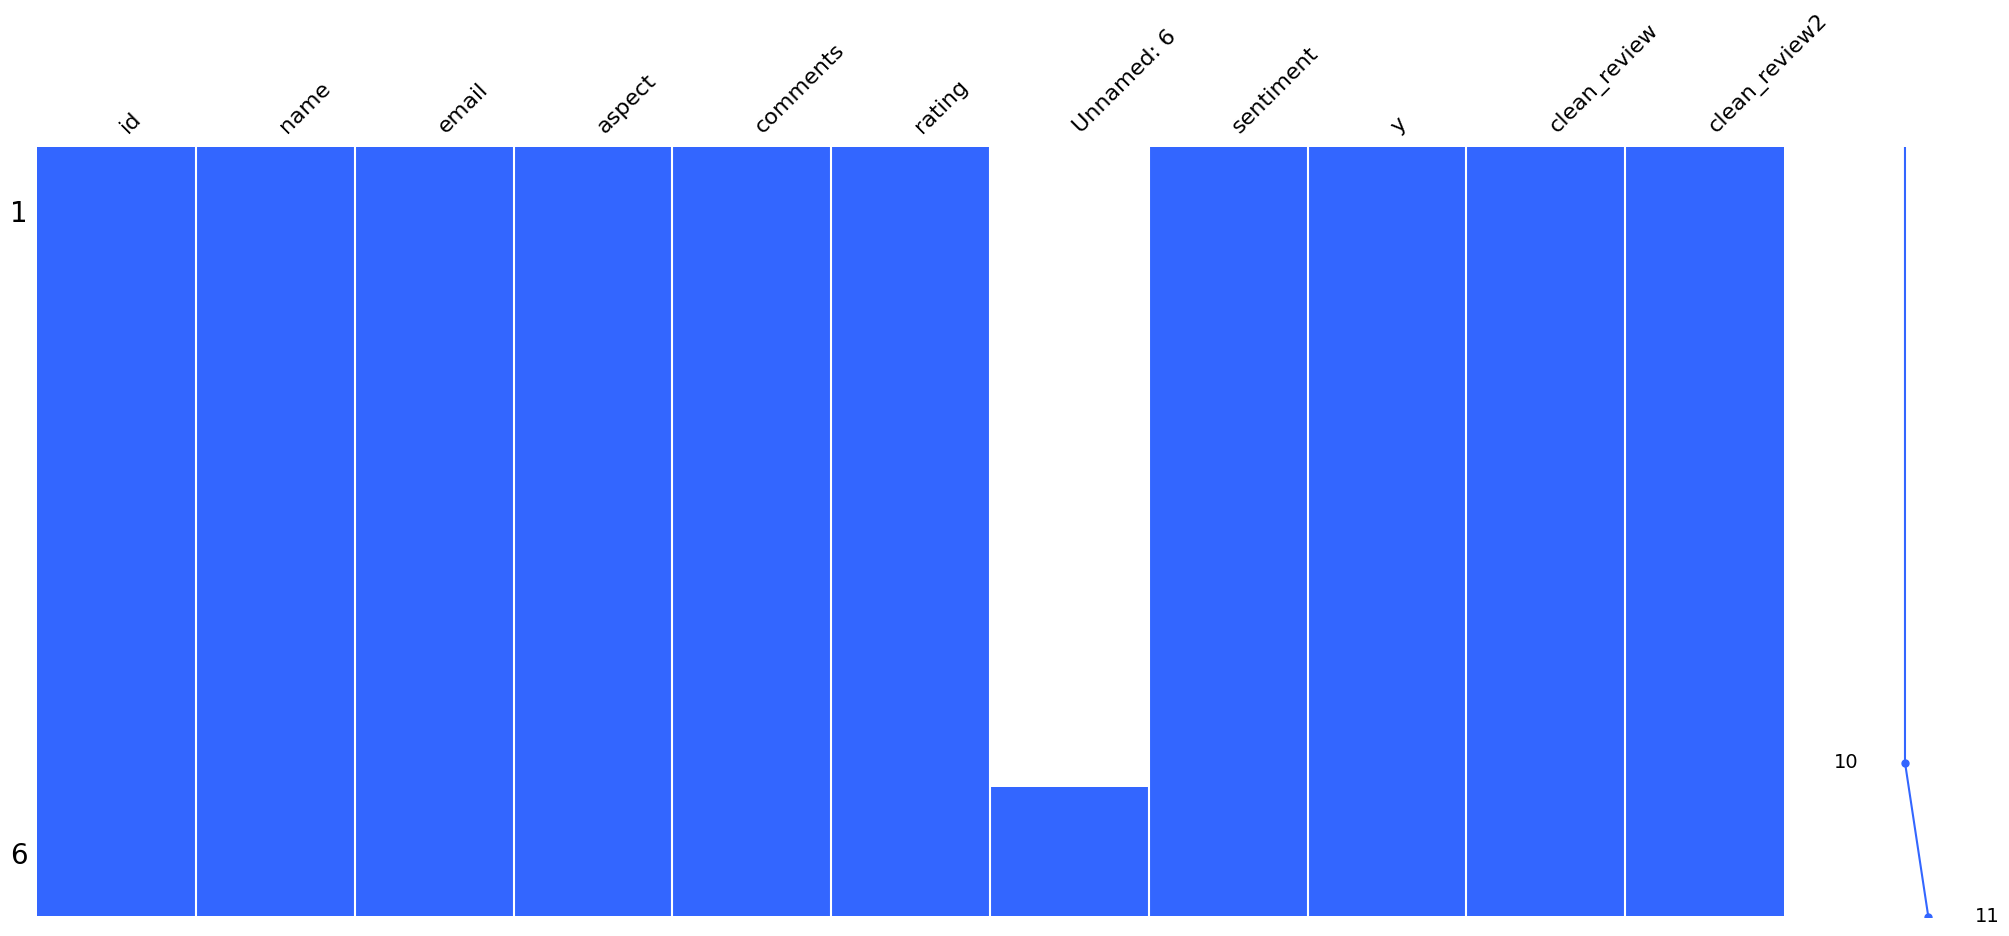

In [41]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [42]:
import re
def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text
# Example string with weird font characters plus an URL which we gonna remove.
sample = "ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 \n https://www.kaggle.com/nkitgupta 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜"
print(f"Text before removing url:- \n {sample}")

sample = remove_url(sample)
print(f"Text after removing url:- \n {sample}")

Text before removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
 https://www.kaggle.com/nkitgupta 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜


In [43]:
print("\u00C7", "\u0043\u0327")
print("\u00C7" == "\u0043\u0327")
print("Ç" == "Ç")

Ç Ç
False
False


In [44]:
import unicodedata as uni
print(f"Text before Unicode Normalization:- \n {sample}")
sample = uni.normalize('NFKD', sample)
print(f"Text after Unicode Normalization:- \n {sample}")

Text before Unicode Normalization:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after Unicode Normalization:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am 😊 to create this notebook


In [45]:
import demoji
def handle_emoji(string):
    emojis = demoji.findall(string)
    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])
    return string
print(f"Before Handling emoji:- \n {sample}")
print(f"After Handling emoji:- \n {handle_emoji(sample)}")

Before Handling emoji:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am 😊 to create this notebook
After Handling emoji:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am  smiling face with smiling eyes to create this notebook


In [46]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()
    return text
sample = "Hi Everyone I am Ankit Gupta."
print(sample)
print(word_tokenizer(sample))

Hi Everyone I am Ankit Gupta.
['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']


In [47]:
from nltk.corpus import stopwords
en_stopwords = set(stopwords.words('english'))
print(f"Stop Words in English : \n{ en_stopwords}")

Stop Words in English : 
{'shouldn', "isn't", 'herself', "shan't", 'a', 'other', 'him', 'off', 'these', 'his', 'mightn', 'or', "won't", 'some', 'which', 'be', 'both', 'couldn', 'too', 'has', 'an', 'then', "she's", 'itself', 'don', 'they', 'any', 'shan', 'we', 'hadn', 'so', 'will', 'our', 't', 'their', 'when', 'there', 'very', 'under', 'few', 'for', 'were', "mightn't", 'her', 'such', 'he', 'you', 'further', 'haven', 'through', 'while', 'own', 'them', 'against', 'yours', 'from', "hasn't", "haven't", 'o', 'but', 'into', 'it', 'who', 'before', 'all', 'by', 'are', 'can', 'just', 're', 'been', "it's", "needn't", 'did', 'doesn', 'theirs', 'my', 'to', 'wasn', 'between', 'hasn', "aren't", 'me', 'aren', 'after', 'again', 'more', 'until', 'because', 'themselves', 'no', 'on', 'myself', 'being', 'in', "couldn't", 'yourself', 'ma', 'out', 'what', 'am', 'each', 'than', 'should', 'd', 'ain', 'didn', 'is', 'had', 'below', 'up', "should've", "you'll", 'mustn', 'ourselves', 'once', 'same', "weren't", "th

In [48]:
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    return text
print(f"Before removing stopwords : {word_tokenizer(sample)}")
print(f"After removing stopwords : {remove_stopwords(word_tokenizer(sample))}")

Before removing stopwords : ['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']
After removing stopwords : ['hi', 'everyone', 'ankit', 'gupta.']


In [49]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
stemmer = PorterStemmer()
# stemmer = LancasterStemmer()
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return text
sample = "I am creating a Notebook"
print(f"Before Stemming : {(sample)}")
print(f"After Stemming : {stemming(word_tokenizer(sample))}")

Before Stemming : I am creating a Notebook
After Stemming : ['i', 'am', 'creat', 'a', 'notebook']


In [50]:
import spacy
sp = spacy.load("en_core_web_sm")
def lemmatization(text):
    # text = [sp(word).lemma_ for word in text]
    text = " ".join(text)
    token = sp(text)
    text = [word.lemma_ for word in token]
    return text

print(f"Before Lemmatization : {word_tokenizer(sample)}")
print(f"After Lemmatization : {lemmatization(word_tokenizer(sample))}")

Before Lemmatization : ['i', 'am', 'creating', 'a', 'notebook']
After Lemmatization : ['I', 'be', 'create', 'a', 'notebook']


In [51]:
from langdetect import detect
en_text = u""""Hi Everyone I am Ankit Gupta."""
print(f" {en_text} : {detect(en_text)}")

hindi_text = u"""मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ"""
print(f"{hindi_text} : {detect(hindi_text)}")

 "Hi Everyone I am Ankit Gupta. : sq
मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ : hi


In [52]:
# Assigning labels to each review
def label(y):
    if y=='Excellent':
        return 3
    elif y=='Very Good':
        return 2
    elif y=='Good':
        return 1
    else:
        return -1
    
from tqdm import tqdm
tqdm.pandas()
df['y'] = df.sentiment.progress_map(label)
df

100%|██████████| 6/6 [00:00<00:00, 1419.95it/s]


,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review,clean_review2
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service,"[tourist, place, provide, good, service]"
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable,"[food, give, restaurant, delicious, i, find, e..."
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple,"[relaxed, ambience, thrissur, popular, temple]"
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...,"[historical, prestige, hotel, ambience, good, ..."
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good,"[hotel, service, good]"
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad,-1,I become ill I admit hospital 3 day,"[i, become, ill, i, admit, hospital, 3, day]"


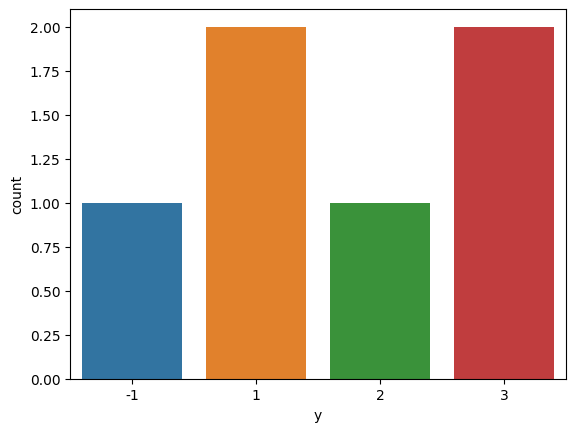

In [53]:
import seaborn as sns
sns.countplot(x = "y", data = df)
plt.show()

In [54]:
P1 = df[(df['sentiment'] == 'Good')]
positive = list(P[(P['comments'].str.len() > 4) & (P['comments'].str.len() < 350)]['comments'])
len(positive)

2

In [55]:
P2 = df[(df['sentiment'] == 'Bad')]
negative1 = list(P2[(P2['comments'].str.len() > 4) & (P2['comments'].str.len() < 350)]['comments'])
len(negative1)

1

In [56]:
P3 = df[(df['sentiment'] == 'Very Good')]
v_positive = list(P3[(P3['comments'].str.len() > 4) & (P3['comments'].str.len() < 350)]['comments'])
len(v_positive)

1

In [57]:
P4 = df[(df['sentiment'] == 'Excellent')]
vvpositive = list(P4[(P4['comments'].str.len() > 4) & (P4['comments'].str.len() < 350)]['comments'])
len(vvpositive)

2

In [58]:
import nlpaug.augmenter.word as naw
positive[0:49]

['The tourist place had provided good services',
 'The relaxed ambience of Thrissur was popular with temples.']

In [59]:
v_positive[0:49]

['Hotel services were good']

In [60]:
vvpositive[0:49]

['The food given in the restaurant was delicious. I found it enjoyable!',
 'The historical prestige and the hotel ambience was good and the service was on point. Good trip!']

In [61]:
negative1[0:49]

['I became ill, so I was admitted in a hospital for 3 days.']

In [62]:
aug = naw.AntonymAug(name='Antonym_Aug', aug_min=1, aug_max=10, aug_p=0.3, lang='eng', stopwords=en_stopwords, tokenizer=None, 
                     reverse_tokenizer=None, stopwords_regex=None, verbose=0) 
aug_negative = aug.augment(positive)
len(aug_negative)

2

In [63]:
def preprocessing(text):
    text = remove_url(text) 
    text = uni.normalize('NFKD', text)
    text = handle_emoji(text)
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)
    return text
from tqdm import tqdm
tqdm.pandas()
df['clean_review'] = df['comments'].progress_map(preprocessing)
df

100%|██████████| 6/6 [00:03<00:00,  1.67it/s]


,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review,clean_review2
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service,"[tourist, place, provide, good, service]"
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable,"[food, give, restaurant, delicious, i, find, e..."
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple,"[relaxed, ambience, thrissur, popular, temple]"
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...,"[historical, prestige, hotel, ambience, good, ..."
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good,"[hotel, service, good]"
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad,-1,I become ill I admit hospital 3 day,"[i, become, ill, i, admit, hospital, 3, day]"


In [64]:
reviews = df.clean_review.values.tolist()
from tqdm import tqdm
tqdm.pandas()
df['clean_review2'] = df['clean_review'].progress_map(word_tokenizer)

100%|██████████| 6/6 [00:00<?, ?it/s]


In [65]:
df['clean_review2']

0             [tourist, place, provide, good, service]
1    [food, give, restaurant, delicious, i, find, e...
2       [relaxed, ambience, thrissur, popular, temple]
3    [historical, prestige, hotel, ambience, good, ...
4                               [hotel, service, good]
5         [i, become, ill, i, admit, hospital, 3, day]
Name: clean_review2, dtype: object

In [66]:
data_words = df['clean_review2'].values.tolist()
print(data_words)
print(len(data_words))

[['tourist', 'place', 'provide', 'good', 'service'], ['food', 'give', 'restaurant', 'delicious', 'i', 'find', 'enjoyable'], ['relaxed', 'ambience', 'thrissur', 'popular', 'temple'], ['historical', 'prestige', 'hotel', 'ambience', 'good', 'service', 'point', 'good', 'trip'], ['hotel', 'service', 'good'], ['i', 'become', 'ill', 'i', 'admit', 'hospital', '3', 'day']]
6


In [67]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [68]:
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=id2word,
                     num_topics=num_topics, iterations=400)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.141*"good" + 0.141*"provide" + 0.141*"tourist" + 0.141*"service" + '
  '0.141*"place" + 0.013*"hotel" + 0.013*"ambience" + 0.013*"i" + '
  '0.013*"popular" + 0.013*"relaxed"'),
 (1,
  '0.036*"service" + 0.036*"good" + 0.036*"hotel" + 0.036*"i" + '
  '0.036*"ambience" + 0.036*"popular" + 0.036*"place" + 0.036*"thrissur" + '
  '0.036*"tourist" + 0.036*"historical"'),
 (2,
  '0.036*"good" + 0.036*"service" + 0.036*"hotel" + 0.036*"ambience" + '
  '0.036*"i" + 0.036*"temple" + 0.036*"tourist" + 0.036*"relaxed" + '
  '0.036*"thrissur" + 0.036*"place"'),
 (3,
  '0.190*"good" + 0.190*"service" + 0.190*"hotel" + 0.017*"ambience" + '
  '0.017*"place" + 0.017*"i" + 0.017*"popular" + 0.017*"relaxed" + '
  '0.017*"temple" + 0.017*"tourist"'),
 (4,
  '0.194*"i" + 0.102*"3" + 0.102*"ill" + 0.102*"hospital" + 0.102*"become" + '
  '0.102*"day" + 0.102*"admit" + 0.009*"service" + 0.009*"good" + '
  '0.009*"hotel"'),
 (5,
  '0.178*"good" + 0.093*"hotel" + 0.093*"service" + 0.093*"prestige" + '

In [69]:
%%time
from gensim.models import FastText
fasttext_model = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 797 ms
Wall time: 2.04 s


In [70]:
%%time
from gensim.models import FastText
fasttext_model1 = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model1)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 1.12 s
Wall time: 2.04 s


In [71]:
%%time
from gensim.models import FastText
fasttext_model2 = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model2)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 953 ms
Wall time: 2.02 s


In [72]:
%%time
from gensim.models import FastText
fasttext_model3 = FastText(data_words, vector_size= 100, window=100, min_count=1, workers=5,sg=1)
print(fasttext_model3)

FastText<vocab=28, vector_size=100, alpha=0.025>
CPU times: total: 1.2 s
Wall time: 1.98 s


In [73]:
fasttext_model.save("FastText-Model-For-ABSA.bin")
print(fasttext_model.wv.n_similarity("Very Good","service"))
print(fasttext_model.wv.n_similarity("Hotel services were good","service"))

0.15506539
0.73245305


In [74]:
fasttext_model1.save("FastText-Model-For-ABSA1.bin")
print(fasttext_model1.wv.n_similarity("Bad","hospitality"))
print(fasttext_model1.wv.n_similarity("I became ill, so I was admitted in a hospital for 3 days.","hospitality"))

0.32133222
0.5149182


In [75]:
fasttext_model2.save("FastText-Model-For-ABSA2.bin")
print(fasttext_model2.wv.n_similarity("Good","ambience"))
print(fasttext_model2.wv.n_similarity("The relaxed ambience of Thrissur was popular with temples.","ambience"))

-0.019609755
0.58824587


In [76]:
fasttext_model3.save("FastText-Model-For-ABSA3.bin")
print(fasttext_model3.wv.n_similarity("Excellent","food"))
print(fasttext_model3.wv.n_similarity("The food given in the restaurant was delicious. I found it enjoyable!","food"))

-0.10728478
0.25900415


In [77]:
aspect = ["service","food","ambience","hospitality"]
def get_similarity(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0

In [78]:
aspect = ["service","food","ambience","hospitality"]
def get_similarity1(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model1.wv.n_similarity(text, aspect)
    except:
        return 0

In [79]:
aspect = ["service","food","ambience","hospitality"]
def get_similarity2(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model2.wv.n_similarity(text, aspect)
    except:
        return 0

In [80]:
aspect = ["service","food","ambience","hospitality"]
def get_similarity3(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model3.wv.n_similarity(text, aspect)
    except:
        return 0

In [81]:
df.to_csv("Trip11.csv", index = True)
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import RandomSampler
import warnings
print(torch)
print(nn)

<module 'torch' from 'c:\\Users\\kasin\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\torch\\__init__.py'>
<module 'torch.nn' from 'c:\\Users\\kasin\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\torch\\nn\\__init__.py'>


In [82]:
class config:
    warnings.filterwarnings("ignore", category = UserWarning)
    IMG_SIZE = (224,224)
    DEVICE = ("cuda" if torch.cuda.is_available() else "cpu")
    FOLDS = 5
    SHUFFLE = True
    BATCH_SIZE = 32
    LR = 0.01
    EPOCHS = 30
    EMB_DIM = 100
    MAX_LEN = 20
    MODEL_PATH = "./Models/MyModel.pt"

In [83]:
df

,id,name,email,aspect,comments,rating,Unnamed: 6,sentiment,y,clean_review,clean_review2
0,1,Yenugu Poojitha,yenugupoojithareddy3107@gmail.com,service,The tourist place had provided good services,4,NaN,Good,1,tourist place provide good service,"[tourist, place, provide, good, service]"
1,2,chitra,chitra123@gmail.com,food,The food given in the restaurant was delicious...,5,NaN,Excellent,3,food give restaurant delicious I find enjoyable,"[food, give, restaurant, delicious, i, find, e..."
2,3,saaket,saaket123@gmail.com,ambience,The relaxed ambience of Thrissur was popular w...,3,NaN,Good,1,relaxed ambience thrissur popular temple,"[relaxed, ambience, thrissur, popular, temple]"
3,4,sravani,sravani18@gmail.com,food,The historical prestige and the hotel ambience...,4,NaN,Excellent,3,historical prestige hotel ambience good servic...,"[historical, prestige, hotel, ambience, good, ..."
4,5,rishikesh,rishikesh31@gmail.com,service,Hotel services were good,3,NaN,Very Good,2,hotel service good,"[hotel, service, good]"
5,6,vinay,vinay14@gmail.com,hospitality,"I became ill, so I was admitted in a hospital ...",3,,Bad,-1,I become ill I admit hospital 3 day,"[i, become, ill, i, admit, hospital, 3, day]"


In [84]:
class Vocabulary:
  
    '''
    __init__ method is called by default as soon as an object of this class is initiated
    we use this method to initiate our vocab dictionaries
    '''
    def __init__(self, freq_threshold, max_size):
        '''
        freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
        max_size : max source vocab size. Eg. if set to 10,000, we pick the top 10,000 most frequent words and discard others
        '''
        #initiate the index to token dict
        ## <PAD> -> padding, used for padding the shorter sentences in a batch to match the length of longest sentence in the batch
        ## <SOS> -> start token, added in front of each sentence to signify the start of sentence
        ## <EOS> -> End of sentence token, added to the end of each sentence to signify the end of sentence
        ## <UNK> -> words which are not found in the vocab are replace by this token
        self.itos = {0: '<PAD>', 1:'<SOS>', 2:'<EOS>', 3: '<UNK>'}
        #initiate the token to index dict
        self.stoi = {k:j for j,k in self.itos.items()} 
        
        self.freq_threshold = freq_threshold
        self.max_size = max_size
    
    '''
    __len__ is used by dataloader later to create batches
    '''
    def __len__(self):
        return len(self.itos)
    
    '''
    a simple tokenizer to split on space and converts the sentence to list of words
    '''
    @staticmethod
    def tokenizer(text):
        return [tok.lower().strip() for tok in text.split(' ')]
    
    '''
    build the vocab: create a dictionary mapping of index to string (itos) and string to index (stoi)
    output ex. for stoi -> {'the':5, 'a':6, 'an':7}
    '''
    def build_vocabulary(self, sentence_list):
        #calculate the frequencies of each word first to remove the words with freq < freq_threshold
        frequencies = {}  #init the freq dict
        idx = 4 #index from which we want our dict to start. We already used 4 indexes for pad, start, end, unk
        #calculate freq of words
        for sentence in sentence_list:
            for word in self.tokenizer(sentence):
                if word not in frequencies.keys():
                    frequencies[word]=1
                else:
                    frequencies[word]+=1
        #limit vocab by removing low freq words
        frequencies = {k:v for k,v in frequencies.items() if v>self.freq_threshold} 
        #limit vocab to the max_size specified
        frequencies = dict(sorted(frequencies.items(), key = lambda x: -x[1])[:self.max_size-idx]) # idx =4 for pad, start, end , unk
        #create vocab
        for word in frequencies.keys():
            self.stoi[word] = idx
            self.itos[idx] = word
            idx+=1
    '''
    convert the list of words to a list of corresponding indexes
    '''    
    def numericalize(self, text):
        #tokenize text
        tokenized_text = self.tokenizer(text)
        numericalized_text = []
        for token in tokenized_text:
            if token in self.stoi.keys():
                numericalized_text.append(self.stoi[token])
            else: #out-of-vocab words are represented by UNK token index
                numericalized_text.append(self.stoi['<UNK>'])
                
        return numericalized_text

In [85]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    '''
    Initiating Variables
    df: the training dataframe
    source_column : the name of source text column in the dataframe
    transform : If we want to add any augmentation
    freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
    source_vocab_max_size : max source vocab size
    '''
    
    def __init__(self, df, source_column,freq_threshold = 3,
                source_vocab_max_size = 10000 , transform=None):
    
        self.df = df
        self.transform = transform
        
        #get source and target texts
        self.source_texts = self.df[source_column]
        
        
        ##VOCAB class has been created above
        #Initialize source vocab object and build vocabulary
        self.source_vocab = Vocabulary(freq_threshold, source_vocab_max_size)
        self.source_vocab.build_vocabulary(self.source_texts.tolist())

        
    def __len__(self):
        return len(self.df)
    
    '''
    __getitem__ runs on 1 example at a time. Here, we get an example at index and return its numericalize source and
    target values using the vocabulary objects we created in __init__
    '''
    def __getitem__(self, index):
        source_text = self.source_texts[index]
        
        if self.transform is not None:
            source_text = self.transform(source_text)
            
        #numericalize texts ['<SOS>','cat', 'in', 'a', 'bag','<EOS>'] -> [1,12,2,9,24,2]
        numerialized_source = [self.source_vocab.stoi["<SOS>"]]
        numerialized_source += self.source_vocab.numericalize(source_text)
        numerialized_source.append(self.source_vocab.stoi["<EOS>"])
        
        #convert the list to tensor and return
        return torch.tensor(numerialized_source), torch.tensor(self.df.y[index])

In [86]:
dataset = CustomDataset(df, "clean_review")
len(dataset.source_vocab.stoi)

5

In [87]:
import pickle
with open('dataset-new', 'wb') as dataset_file:
  # Step 3
    pickle.dump(dataset, dataset_file, pickle.HIGHEST_PROTOCOL)
# import pickle

In [88]:
def get_emb_layer_with_weights(target_vocab, emb_model, trainable = False):
    weights_matrix = np.zeros((len(target_vocab), config.EMB_DIM))
    words_found = 0
    for i, word in enumerate(target_vocab):
        weights_matrix[i] = np.concatenate([emb_model.wv[word]])
        words_found += 1
    print(f"Words found are : {words_found}")
    weights_matrix = torch.tensor(weights_matrix, dtype = torch.float32).reshape(len(target_vocab), config.EMB_DIM)
    emb_layer = nn.Embedding.from_pretrained(weights_matrix)
    print(emb_layer)
    if trainable:
        emb_layer.weight.requires_grad = True
    else:
        emb_layer.weight.requires_grad = False
    return emb_layer

In [89]:
class MyCollate:
    def __init__(self, pad_idx, maxlen):
        self.pad_idx = pad_idx
        self.maxlen = maxlen
    #__call__: a default method
    ##   First the obj is created using MyCollate(pad_idx) in data loader
    ##   Then if obj(batch) is called -> __call__ runs by default
    def __call__(self, batch):
        #get all source indexed sentences of the batch
        source = [item[0] for item in batch] 
        #pad them using pad_sequence method from pytorch. 
#         source = pad_sequence(source, batch_first=False, padding_value = self.pad_idx)
        padded_sequence = torch.zeros((self.maxlen, len(batch)), dtype = torch.int)
        for idx, text in enumerate(source):
            if len(text) > self.maxlen:
                padded_sequence[:, idx] = source[idx][: self.maxlen]
            else:
                padded_sequence[:len(source[idx]), idx] = padded_sequence[:len(source[idx]), idx] + source[idx]
        #get all target indexed sentences of the batch
        target = [item[1] for item in batch] 
        target = torch.tensor(target, dtype = torch.float32).reshape(-1)
        return padded_sequence, target

In [90]:
class Model(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, embedding_layer):
        super().__init__()
#         self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.hidden_dim = hidden_dim
        self.embedding = embedding_layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional = True)
        self.fc1 = nn.Linear(2*hidden_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()


        
    def forward(self, text):
        
        max_len, N = text.shape
        hidden = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        memory = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        hidden = hidden.to(config.DEVICE)
        memory = memory.to(config.DEVICE)
        embedded = self.embedding(text)
        output, hidden = self.lstm(embedded, (hidden, memory))
#         assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        y_pred = output[-1,:,:]
        y_pred = self.fc1(y_pred)
        y_pred = self.fc2(y_pred)
        y_pred = self.sigmoid(y_pred)
                         
        return y_pred  

In [91]:
def train_epochs(dataloader,model, loss_fn, optimizer):
    train_correct = 0
    train_loss = 0
    
    model.train()

    for review, label in tqdm(dataloader):
        
        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        optimizer.zero_grad()
        output = model(review)
        output = output.reshape(-1)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        train_correct += (prediction == label).float().sum()
        
    return train_loss, train_correct

In [92]:
def val_epochs(dataloader, model, loss_fn):
    val_correct = 0
    val_loss = 0
    
    model.eval()
#     hidden = model.init_hidden(config.BATCH_SIZE)

    for review, label in dataloader:
        
        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        
        output = model(review)
        output = output.reshape(-1)

        loss = loss_fn(output, label)
        
        val_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        val_correct += (prediction == label).float().sum()
#         prediction = 
    return val_loss, val_correct

In [93]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader 
import matplotlib.pyplot as plt


# sfk = StratifiedKFold(n_splits = config.FOLDS)
kfold = KFold(n_splits = config.FOLDS)
model_state_dicts = {}
 
for fold, (train_idx, val_idx) in enumerate(kfold.split(np.arange(len(dataset)))):
    
    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)
    
    train_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = train_sampler, collate_fn = MyCollate(0, config.MAX_LEN))
    val_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = val_sampler, collate_fn = MyCollate(0, config.MAX_LEN))  
    
    VOCAB_SIZE = len(dataset.source_vocab)
    HIDDEN_DIM = 128
    OUTPUT_DIM = 1
    VOCAB = list(dataset.source_vocab.stoi)

    embedding_layer = get_emb_layer_with_weights(target_vocab = VOCAB, emb_model = fasttext_model, trainable = False)

    model = Model(VOCAB_SIZE, config.EMB_DIM, HIDDEN_DIM, OUTPUT_DIM, embedding_layer)
    model = model.to(config.DEVICE)
    
#     model
#     model = Model(2, len(dataset.source_vocab), 128, 100, 1 ).to(config.DEVICE)
#     hidden = model.init_hidden(config.BATCH_SIZE)
#     model.hidden = hidden

    loss_fn = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
    
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    print(f"-----------------------------------------------------------{fold}-fold of the model-----------------------------------------------------------")
    for epoch in range(config.EPOCHS):
        train_loss, train_correct = train_epochs(train_loader, model, loss_fn, optimizer)
        val_loss, val_correct = val_epochs(val_loader, model, loss_fn)  
        
        train_loss = train_loss/len(train_loader.sampler)
        val_loss = val_loss/len(val_loader.sampler)
        train_acc = (train_correct/len(train_loader.sampler))*100
        val_acc = (val_correct/len(val_loader.sampler))*100
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc.cpu().numpy().tolist())
        val_accs.append(val_acc.cpu().numpy().tolist())
        
        print(f"| Train Loss : {train_loss} |", end = " ")
        print(f" Val Loss : {val_loss} |", end = " ")
        print(f"Train Acc : {train_acc} |", end = " ")
        print(f"Val Acc : {val_acc} |")

        
    # Saving the state dicts for the model
    model_state_dicts.update({f"LSTM-Model-for-{fold}" : model.state_dict(),
                             f"Model-Optimizer-for-{fold}" : optimizer.state_dict()})

Words found are : 5
Embedding(5, 100)
-----------------------------------------------------------0-fold of the model-----------------------------------------------------------


100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


| Train Loss : 0.6726016998291016 |  Val Loss : 0.47538772225379944 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 58.52it/s]


| Train Loss : 0.5856163501739502 |  Val Loss : 0.309171587228775 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 66.58it/s]


| Train Loss : 0.5054268836975098 |  Val Loss : 0.15090516209602356 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 90.13it/s]


| Train Loss : 0.4306730329990387 |  Val Loss : -0.0012780725955963135 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 87.95it/s]


| Train Loss : 0.36032456159591675 |  Val Loss : -0.14885157346725464 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 76.76it/s]


| Train Loss : 0.2935902178287506 |  Val Loss : -0.292993426322937 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 90.80it/s]


| Train Loss : 0.22985559701919556 |  Val Loss : -0.43466100096702576 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 38.46it/s]


| Train Loss : 0.16863887012004852 |  Val Loss : -0.5746432542800903 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 66.76it/s]

| Train Loss : 0.10955697298049927 |

  Val Loss : -0.7135981321334839 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 93.67it/s]


| Train Loss : 0.05230367183685303 |  Val Loss : -0.852084755897522 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 73.88it/s]


| Train Loss : -0.0033716559410095215 |  Val Loss : -0.9905880093574524 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 63.10it/s]


| Train Loss : -0.057675801217556 |  Val Loss : -1.1295393705368042 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 58.70it/s]


| Train Loss : -0.11078628897666931 |  Val Loss : -1.2693336009979248 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 95.01it/s]


| Train Loss : -0.16285938024520874 |  Val Loss : -1.4103449583053589 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 74.24it/s]


| Train Loss : -0.21403884887695312 |  Val Loss : -1.5529427528381348 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 66.05it/s]


| Train Loss : -0.26446259021759033 |  Val Loss : -1.697502851486206 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 78.52it/s]


| Train Loss : -0.3142679035663605 |  Val Loss : -1.8444195985794067 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 77.65it/s]


| Train Loss : -0.36359718441963196 |  Val Loss : -1.994118094444275 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 78.39it/s]


| Train Loss : -0.412598192691803 |  Val Loss : -2.147067070007324 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 83.37it/s]


| Train Loss : -0.4614335596561432 |  Val Loss : -2.3037874698638916 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 80.10it/s]


| Train Loss : -0.510277509689331 |  Val Loss : -2.4648666381835938 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 102.26it/s]


| Train Loss : -0.5593231320381165 |  Val Loss : -2.6309690475463867 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 56.93it/s]


| Train Loss : -0.6087818145751953 |  Val Loss : -2.8028554916381836 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 90.12it/s]


| Train Loss : -0.6588904857635498 |  Val Loss : -2.981390953063965 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 66.64it/s]

| Train Loss : -0.7099112272262573 |

  Val Loss : -3.167574167251587 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 66.50it/s]


| Train Loss : -0.762140154838562 |  Val Loss : -3.3625540733337402 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 62.49it/s]


| Train Loss : -0.8159077167510986 |  Val Loss : -3.5676636695861816 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 80.22it/s]


| Train Loss : -0.8715920448303223 |  Val Loss : -3.7844576835632324 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 76.94it/s]


| Train Loss : -0.9296244382858276 |  Val Loss : -4.014745235443115 | Train Acc : 25.0 | Val Acc : 50.0 |


100%|██████████| 1/1 [00:00<00:00, 42.49it/s]


| Train Loss : -0.9905047416687012 |  Val Loss : -4.260670185089111 | Train Acc : 25.0 | Val Acc : 50.0 |
Words found are : 5
Embedding(5, 100)
-----------------------------------------------------------1-fold of the model-----------------------------------------------------------


100%|██████████| 1/1 [00:00<00:00, 44.42it/s]


| Train Loss : 0.5779373049736023 |  Val Loss : 0.5613275766372681 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 64.27it/s]

| Train Loss : 0.3911123275756836 |

  Val Loss : 0.4896611273288727 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 62.50it/s]


| Train Loss : 0.2141171395778656 |  Val Loss : 0.42474520206451416 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 71.71it/s]


| Train Loss : 0.04291336610913277 |  Val Loss : 0.3654465973377228 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 71.11it/s]


| Train Loss : -0.12556485831737518 |  Val Loss : 0.3110891580581665 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 74.72it/s]


| Train Loss : -0.2937711179256439 |  Val Loss : 0.26131540536880493 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 70.41it/s]


| Train Loss : -0.46379929780960083 |  Val Loss : 0.21598395705223083 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 81.41it/s]


| Train Loss : -0.637584388256073 |  Val Loss : 0.17508888244628906 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 77.52it/s]


| Train Loss : -0.8170930743217468 |  Val Loss : 0.13869057595729828 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 78.39it/s]


| Train Loss : -1.0045255422592163 |  Val Loss : 0.10685780644416809 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 66.66it/s]


| Train Loss : -1.202549695968628 |  Val Loss : 0.07962294667959213 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 75.03it/s]


| Train Loss : -1.414600133895874 |  Val Loss : 0.05694691836833954 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 68.41it/s]


| Train Loss : -1.6452667713165283 |  Val Loss : 0.03869694843888283 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 80.33it/s]


| Train Loss : -1.9008491039276123 |  Val Loss : 0.024631617590785027 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 86.56it/s]


| Train Loss : -2.190190553665161 |  Val Loss : 0.014389794319868088 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 77.37it/s]


| Train Loss : -2.5260190963745117 |  Val Loss : 0.007484599947929382 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 62.51it/s]


| Train Loss : -2.9272005558013916 |  Val Loss : 0.003306424943730235 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 66.61it/s]


| Train Loss : -3.4228339195251465 |  Val Loss : 0.001148406183347106 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 61.62it/s]


| Train Loss : -4.060093402862549 |  Val Loss : 0.00027415933436714113 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 12.21it/s]


| Train Loss : -4.92055082321167 |  Val Loss : 3.49289330188185e-05 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 28.30it/s]


| Train Loss : -6.157271385192871 |  Val Loss : 1.4305124977909145e-06 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 64.27it/s]


| Train Loss : -8.074484825134277 |  Val Loss : 0.0 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 55.55it/s]


| Train Loss : -60.0 |  Val Loss : 0.0 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 82.18it/s]


| Train Loss : -60.0 |  Val Loss : 0.0 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 92.44it/s]


| Train Loss : -60.0 |  Val Loss : 0.0 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 83.83it/s]


| Train Loss : -60.0 |  Val Loss : 0.0 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


| Train Loss : -60.0 |  Val Loss : 0.0 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 69.12it/s]


| Train Loss : -60.0 |  Val Loss : 0.0 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 80.88it/s]


| Train Loss : -60.0 |  Val Loss : 0.0 | Train Acc : 20.0 | Val Acc : 100.0 |


100%|██████████| 1/1 [00:00<00:00, 85.06it/s]


| Train Loss : -60.0 |  Val Loss : 0.0 | Train Acc : 20.0 | Val Acc : 100.0 |
Words found are : 5
Embedding(5, 100)
-----------------------------------------------------------2-fold of the model-----------------------------------------------------------


100%|██████████| 1/1 [00:00<00:00, 67.74it/s]


| Train Loss : 0.7418274879455566 |  Val Loss : 0.5794481039047241 | Train Acc : 0.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 90.62it/s]


| Train Loss : 0.6614973545074463 |  Val Loss : 0.30787205696105957 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 82.88it/s]


| Train Loss : 0.5874380469322205 |  Val Loss : 0.04734230041503906 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 71.10it/s]


| Train Loss : 0.5184691548347473 |  Val Loss : -0.20481610298156738 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 47.62it/s]


| Train Loss : 0.45369571447372437 |  Val Loss : -0.4507269859313965 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 74.49it/s]


| Train Loss : 0.3924315869808197 |  Val Loss : -0.69209885597229 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 74.92it/s]


| Train Loss : 0.3341448903083801 |  Val Loss : -0.930316686630249 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 90.44it/s]


| Train Loss : 0.2784212529659271 |  Val Loss : -1.166517972946167 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 71.44it/s]


| Train Loss : 0.22493405640125275 |  Val Loss : -1.4016404151916504 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 66.66it/s]


| Train Loss : 0.1734257936477661 |  Val Loss : -1.6364690065383911 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 71.45it/s]

| Train Loss : 0.12368931621313095 |

  Val Loss : -1.8716620206832886 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 71.59it/s]


| Train Loss : 0.0755569189786911 |  Val Loss : -2.107783555984497 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 79.36it/s]

| Train Loss : 0.028888892382383347 |  Val Loss : -2.3453292846679688 | Train Acc : 40.0 | Val Acc : 0.0 |



100%|██████████| 1/1 [00:00<00:00, 84.09it/s]


| Train Loss : -0.0164334774017334 |  Val Loss : -2.584742546081543 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 93.65it/s]


| Train Loss : -0.06051630899310112 |  Val Loss : -2.8264379501342773 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 47.20it/s]


| Train Loss : -0.10345707088708878 |  Val Loss : -3.0708179473876953 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 61.39it/s]


| Train Loss : -0.14535006880760193 |  Val Loss : -3.318284273147583 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 62.00it/s]


| Train Loss : -0.18628831207752228 |  Val Loss : -3.569258213043213 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 48.53it/s]


| Train Loss : -0.2263670414686203 |  Val Loss : -3.824195623397827 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 41.66it/s]

| Train Loss : -0.26568612456321716 |

  Val Loss : -4.083589553833008 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 47.10it/s]


| Train Loss : -0.3043498992919922 |  Val Loss : -4.347994327545166 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 22.70it/s]


| Train Loss : -0.34246891736984253 |  Val Loss : -4.618023872375488 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 29.41it/s]


| Train Loss : -0.38016167283058167 |  Val Loss : -4.894379615783691 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 41.34it/s]


| Train Loss : -0.4175523817539215 |  Val Loss : -5.177848815917969 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 58.82it/s]


| Train Loss : -0.45477595925331116 |  Val Loss : -5.469324588775635 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 62.30it/s]


| Train Loss : -0.4919770359992981 |  Val Loss : -5.769811153411865 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 49.83it/s]


| Train Loss : -0.5293064713478088 |  Val Loss : -6.080465793609619 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 23.81it/s]


| Train Loss : -0.5669304132461548 |  Val Loss : -6.402584075927734 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 58.84it/s]


| Train Loss : -0.6050277948379517 |  Val Loss : -6.737637042999268 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 50.20it/s]


| Train Loss : -0.6437927484512329 |  Val Loss : -7.087331771850586 | Train Acc : 40.0 | Val Acc : 0.0 |
Words found are : 5
Embedding(5, 100)
-----------------------------------------------------------3-fold of the model-----------------------------------------------------------


100%|██████████| 1/1 [00:00<00:00, 62.50it/s]

| Train Loss : 0.6973814964294434 |

  Val Loss : 0.47706925868988037 | Train Acc : 0.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 62.50it/s]


| Train Loss : 0.5645632743835449 |  Val Loss : 0.2644972801208496 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 48.70it/s]


| Train Loss : 0.4402318596839905 |  Val Loss : 0.058936893939971924 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 50.00it/s]

| Train Loss : 0.32216909527778625 |

  Val Loss : -0.14232367277145386 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 46.58it/s]

| Train Loss : 0.208744615316391 |

  Val Loss : -0.34140992164611816 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 58.84it/s]


| Train Loss : 0.0987376719713211 |  Val Loss : -0.540041983127594 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 33.34it/s]


| Train Loss : -0.008783507160842419 |  Val Loss : -0.7396555542945862 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 46.46it/s]

| Train Loss : -0.11455283313989639 |

  Val Loss : -0.9415078163146973 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 50.02it/s]


| Train Loss : -0.21917228400707245 |  Val Loss : -1.146765112876892 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 58.84it/s]


| Train Loss : -0.3231728672981262 |  Val Loss : -1.356577754020691 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 49.97it/s]


| Train Loss : -0.4270589351654053 |  Val Loss : -1.572162389755249 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 80.72it/s]


| Train Loss : -0.5313586592674255 |  Val Loss : -1.794879674911499 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 55.55it/s]


| Train Loss : -0.6366583108901978 |  Val Loss : -2.0263144969940186 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


| Train Loss : -0.7436437606811523 |  Val Loss : -2.2683639526367188 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 36.69it/s]


| Train Loss : -0.8531416058540344 |  Val Loss : -2.523343801498413 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 62.51it/s]


| Train Loss : -0.9661535024642944 |  Val Loss : -2.794113874435425 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 41.64it/s]


| Train Loss : -1.0839133262634277 |  Val Loss : -3.0842337608337402 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 69.30it/s]


| Train Loss : -1.207945466041565 |  Val Loss : -3.3981847763061523 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 50.01it/s]


| Train Loss : -1.3401474952697754 |  Val Loss : -3.74167537689209 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 79.12it/s]


| Train Loss : -1.4829169511795044 |  Val Loss : -4.122050762176514 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 75.78it/s]


| Train Loss : -1.6393158435821533 |  Val Loss : -4.548951148986816 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 82.38it/s]


| Train Loss : -1.8133271932601929 |  Val Loss : -5.0352463722229 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 84.52it/s]

| Train Loss : -2.010225772857666 |

  Val Loss : -5.598548889160156 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 72.01it/s]


| Train Loss : -2.2372097969055176 |  Val Loss : -6.263601303100586 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 79.84it/s]


| Train Loss : -2.504301071166992 |  Val Loss : -7.066372394561768 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 79.67it/s]


| Train Loss : -2.826037645339966 |  Val Loss : -8.061328887939453 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 83.00it/s]


| Train Loss : -3.2243423461914062 |  Val Loss : -9.334208488464355 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 81.69it/s]


| Train Loss : -3.733630418777466 |  Val Loss : -11.02969741821289 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 14.94it/s]


| Train Loss : -4.411868572235107 |  Val Loss : -13.377432823181152 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 80.82it/s]


| Train Loss : -5.350972652435303 |  Val Loss : -100.0 | Train Acc : 40.0 | Val Acc : 0.0 |
Words found are : 5
Embedding(5, 100)
-----------------------------------------------------------4-fold of the model-----------------------------------------------------------


100%|██████████| 1/1 [00:00<00:00, 55.98it/s]


| Train Loss : 0.7739928364753723 |  Val Loss : 0.9946560263633728 | Train Acc : 0.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 76.94it/s]


| Train Loss : 0.40139874815940857 |  Val Loss : 1.3787457942962646 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 89.05it/s]


| Train Loss : 0.05577757954597473 |  Val Loss : 1.7824757099151611 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 90.43it/s]


| Train Loss : -0.2802489399909973 |  Val Loss : 2.2222838401794434 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 103.59it/s]


| Train Loss : -0.6195705533027649 |  Val Loss : 2.7158358097076416 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 60.65it/s]


| Train Loss : -0.9731802940368652 |  Val Loss : 3.2837917804718018 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 80.55it/s]


| Train Loss : -1.351928949356079 |  Val Loss : 3.9519317150115967 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 80.39it/s]


| Train Loss : -1.7681913375854492 |  Val Loss : 4.754406452178955 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 80.07it/s]


| Train Loss : -2.238039493560791 |  Val Loss : 5.739358901977539 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 85.84it/s]


| Train Loss : -2.7846152782440186 |  Val Loss : 6.979308128356934 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 69.30it/s]


| Train Loss : -3.4438889026641846 |  Val Loss : 8.59152603149414 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 87.64it/s]


| Train Loss : -4.275323867797852 |  Val Loss : 10.78136157989502 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 79.99it/s]


| Train Loss : -5.383842468261719 |  Val Loss : 13.945639610290527 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 82.21it/s]


| Train Loss : -6.971414089202881 |  Val Loss : 18.958635330200195 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 70.27it/s]


| Train Loss : -9.479204177856445 |  Val Loss : 27.992950439453125 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 71.43it/s]


| Train Loss : -13.99647331237793 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 76.90it/s]


| Train Loss : -100.0 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 83.16it/s]


| Train Loss : -100.0 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 87.84it/s]


| Train Loss : -100.0 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 83.32it/s]


| Train Loss : -100.0 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 83.32it/s]


| Train Loss : -100.0 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 86.70it/s]


| Train Loss : -100.0 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 75.47it/s]


| Train Loss : -100.0 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 84.98it/s]


| Train Loss : -100.0 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 90.94it/s]


| Train Loss : -100.0 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 81.32it/s]


| Train Loss : -100.0 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 88.87it/s]


| Train Loss : -100.0 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 89.40it/s]


| Train Loss : -100.0 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 96.60it/s]


| Train Loss : -100.0 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


100%|██████████| 1/1 [00:00<00:00, 70.02it/s]

| Train Loss : -100.0 |  Val Loss : 200.0 | Train Acc : 40.0 | Val Acc : 0.0 |


In [94]:
torch.save(model_state_dicts, "My-Model.pt")

In [95]:
def numericalize(text):
    numerialized_source = [] 
    numerialized_source = [dataset.source_vocab.stoi["<SOS>"]]
    numerialized_source += dataset.source_vocab.numericalize(text)
    numerialized_source.append(dataset.source_vocab.stoi["<EOS>"])
    return numerialized_source
def padding(source):
    padded_sequence = torch.zeros(config.MAX_LEN, 1, dtype = torch.int)
    source = torch.tensor(source)
    if len(source) > config.MAX_LEN:
        padded_sequence[:, 0] = source[: config.MAX_LEN]
    else:
        padded_sequence[:len(source), 0] = padded_sequence[:len(source), 0] + source
    return padded_sequence

In [96]:
t0 = "Hotel services were good"    #,service,Very Good
t1 = "I became ill, so I was admitted in a hospital for 3 days."    #Bad,hospitality
t2 = "The relaxed ambience of Thrissur was popular with temples."   #Good,ambience
t3 = "The food given in the restaurant was delicious. I found it enjoyable!" #Excellent,food



sample = "beautiful"
sample2= "The historical prestige and the hotel ambience was good and the service was on point. Good trip!"
destination = aspect

    
def best_aspect(text, aspects):
    a = []
    
    for aspect in aspects:
        a.append(get_similarity(text, aspect))
    
    return aspects[np.argmax(a)]
def infer_processing(text):
    
    text = preprocessing(text)
    text = numericalize(text)
    text = padding(text)
    return text
ba0 = best_aspect(preprocessing(t0), destination)

a0 = infer_processing(t0).to(config.DEVICE)

model.eval()
sentiment = model(a0)
sentiment = sentiment.cpu().detach().numpy()[0]

if sentiment > 0.5:
    sentiment = 'Positively'
else :
    sentiment = 'Negatively'

print(f"The reviewer is talking {sentiment} about the {ba0} of the trip in his/her comment")

The reviewer is talking Positively about the service of the trip in his/her comment


In [97]:
ba1 = best_aspect(preprocessing(t1), destination)

a1 = infer_processing(t1).to(config.DEVICE)

model.eval()
sentiment = model(a1)
sentiment = sentiment.cpu().detach().numpy()[0]

if sentiment > 0.5:
    sentiment = 'Positively'
else :
    sentiment = 'Negatively'

print(f"The reviewer is talking {sentiment} about the {ba1} of the trip in his/her comment")

The reviewer is talking Positively about the hospitality of the trip in his/her comment


In [98]:
ba2 = best_aspect(preprocessing(t2), destination)
a2 = infer_processing(t2).to(config.DEVICE)
model.eval()
sentiment = model(a2)
sentiment = sentiment.cpu().detach().numpy()[0]
if sentiment > 0.5:
    sentiment = 'Positively'
else :
    sentiment = 'Negatively'
print(f"The reviewer is talking {sentiment} about the {ba2} of the trip in his/her comment")

The reviewer is talking Positively about the ambience of the trip in his/her comment


In [99]:
ba3 = best_aspect(preprocessing(t3), destination)
a3 = infer_processing(t3).to(config.DEVICE)
model.eval()
sentiment = model(a3)
sentiment = sentiment.cpu().detach().numpy()[0]
if sentiment > 0.5:
    sentiment = 'Positively'
else :
    sentiment = 'Negatively'
print(f"The reviewer is talking {sentiment} about the {ba0} of the trip in his/her comment")

The reviewer is talking Positively about the service of the trip in his/her comment
